<a href="https://colab.research.google.com/github/rrstats/Coursework-Foundations-of-Data-Science-/blob/main/L28_Designing_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
#If ths sample is 
# large,
# drawn at random with replacement

# Then, regardless of the distribution of the population,
# the probability distribution of the sample average is roughly normal

#CAN'T BE USED FOR SMALL QUANTITIES

In [ ]:
#mean = population mean
#SD = (population SD) / sqrt(sample size)

## Review : Lec 24
Fram a random sample, construct a 95% confidence interval for the ages of the mothers in the population

In [ ]:
#original sample

births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [ ]:
def one_bootstrap_mean():
  resample = births.sample()
  return np.average(resample.column('Maternal Age'))

In [ ]:
#Generate mean from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
  bstrap_means = np.append(bstrap_means, one_bootstrap_mean()) 

In [ ]:
#Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

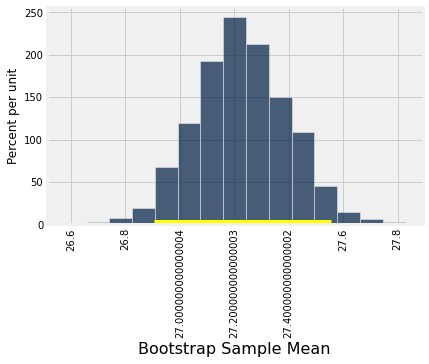

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plt.plot((left, right), [0,0], color='yellow', lw=9)

In [ ]:
left, right

(26.906303236797275, 27.557069846678022)

Method Based on CLT

In [ ]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)
sample_size, sample_average, sample_SD

(1174, 27.228279386712096, 5.815360404190897)

Start with sample_average as the centre of the interval
We need to add and subtract 2*(population SD)/sqrt(sample_size) but we donn't have the population SD

In [ ]:
#Try estimating from the sample

estimated_SD_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SD_of_sample_average

0.16972373742299796

In [ ]:
#Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.0, array([ 0.33944747, 27.56772686])], dtype=object),
 array([0.6788949496919918, array([ 1.01834242, 28.24662181])],
       dtype=object))

In [ ]:
#Answer to the above should be
26.8888, 27.5677

(26.8888, 27.5677)

In [ ]:
#If we can make a 95% confidence interval in this way:

#then why did we learn to make confidence intervals by using the bootstrap

#Main rasons
  #This method is based on the CLT and applies only to means.
  #The bootstrap can be used with other statistics too, such as medians
  #With the bootstrap, you don't need SD formulas

Width & Sample Size
ACCURACY

Suppose you are estimating a population mean

For a fixed level of confidence (for example, 95%)
  Narrower intervals are more accurate
  For narrower intervals we need larger samples

How large?

In [ ]:
#2*2* population SD/sqrt(sample_mean)

Sample Size for Specified Width

width = 4* (population SD)/sqrt(sample_mean)

Hence,
sqrt(sample_size) = 4*  population SD/width
To get the sample size, we need an estimate(or overestimate) of the population SD
  We can't get this from the sample because we don't have a sample yet!

In [ ]:
#Estimating Proportions

In [ ]:
#Proportions are Averages

In [ ]:
#Data: 0 1 0 0 1 0 1 1 0 0 (10 entries)
#Sum = 4 = number of 1's
#Average = 4/10 = 0.4 = proportion of 1's in the population
#the sample average is the proportion of 1's in the sample

**Controlling the Width**
Total width of an approximate 95% confidence interval for a population proportion

= 4* (SD of 0/1 population) / sqrt(sample_size)

Narrower the interval, the more accurate your estimate
Suppose you want the total width of the interval to ve no more than 3%.
How should you choose your sample size?

In [ ]:
#sqrt(sample_size) = 4* (SD of 0/1 population) / 0.03

In [ ]:
#0/1 population of size 10

number_of_ones = 8
number_of_zeroes = 10 - number_of_ones
ones_array = np.ones(number_of_ones)
zeros_array = np.zeros(number_of_zeroes)
zero_one_population = np.append(ones_array, zeros_array)

print('Standard Deviation:', np.round(np.std(zero_one_population), 2))
zero_one_population

Standard Deviation: 0.4


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [ ]:
def sd_of_zero_one_population(number_of_ones):
  # Returns SD of population
  # that has 10 elements: num_ones with value 1 & (10 - num_values) with value 0
  zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10-number_of_ones))

  return np.std(zero_one_population)

In [ ]:
#0/1 Populations of size 10

possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show(11)

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [ ]:
#A function has been applied
sds =zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


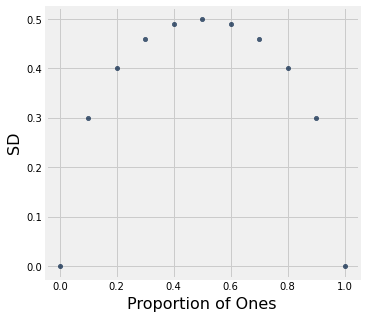

In [ ]:
zero_one_pop.scatter("Proportion of Ones", 'SD')

In [ ]:
# "WORST CASE" 0/1 Population SD
#0.5 will be the highest amount of standard deviation and therefore,

#sqrt(sample size) = 4 * (SD of 0/1 population) / 0.03
#                  = 4 * (0.5)/0.03 will work

#sample size = 4444.44
#Sample size 4445 will work no matter what the population proportion is.

** L29 Confidence Interval Width ** 

Discussion Question
How can a sample of 1004 American represent a 260 million population

In [ ]:
2 * 0.5 / (1004**0.5)

0.031559720154890156

In [ ]:
2*0.5 / (10000**0.5)

0.01

Simulate the Number of Heads in 100 Tosses

In [ ]:
coin = make_array('H', 'T')
num_tosses = 100

In [ ]:
def one_simulated_count():
  tosses = np.random.choice(coin, num_tosses)
  return sum(tosses == 'H')
  

In [ ]:
num_repetitions = 10000
counts = make_array()
for i in np.arange(num_repetitions):
  counts = np.append(counts, one_simulated_count())

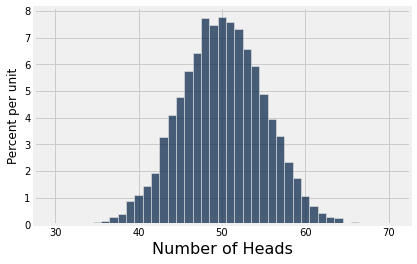

In [ ]:
Table().with_columns(
    'Number of Heads', counts
).hist(bins=np.arange(29.5, 70.6, 1))

In [ ]:
#WOrst Case Scenario
#SD is AT MOST 0.5
(2 * 0.5 / 0.025)**2

1600.0